In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

In [2]:
dataset=pd.read_csv('titanic_train.csv')

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
sex=dataset["Sex"]

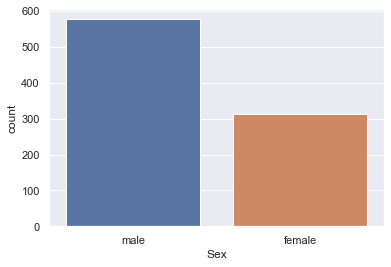

In [6]:
sns.countplot(sex)

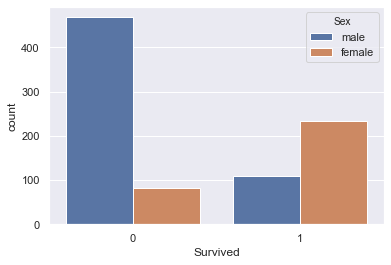

In [7]:
 ax = sns.countplot(x="Survived", data=dataset,hue="Sex")

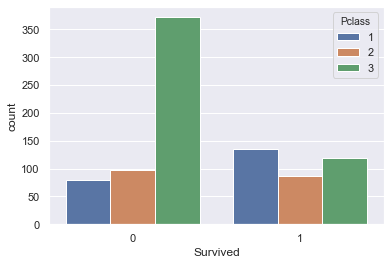

In [8]:
 ax = sns.countplot(x="Survived", data=dataset,hue="Pclass")

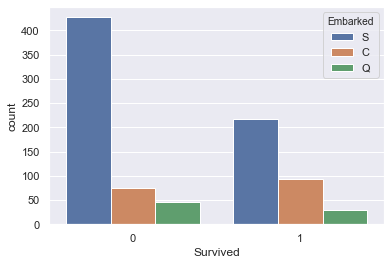

In [9]:
ax=sns.countplot(x="Survived",data=dataset,hue="Embarked")

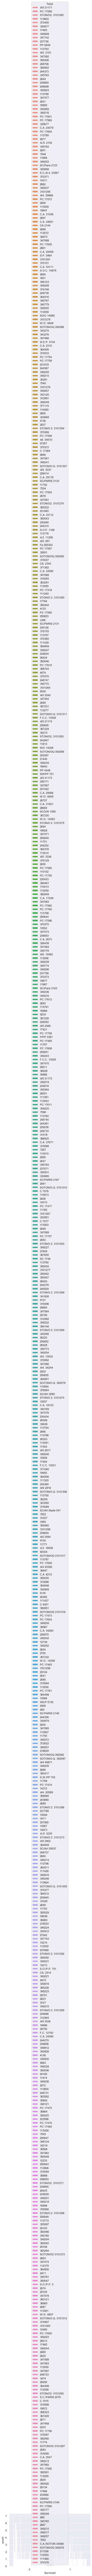

In [10]:
ax=sns.countplot(x="Survived",data=dataset,hue="Ticket")#no relation between tickets and survived

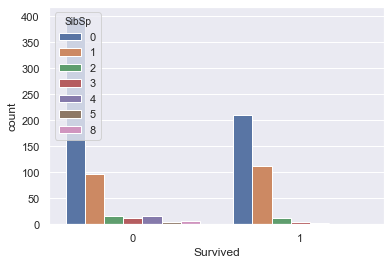

In [11]:
ax=sns.countplot(x="Survived",data=dataset,hue="SibSp")#sibling also depend on survivde

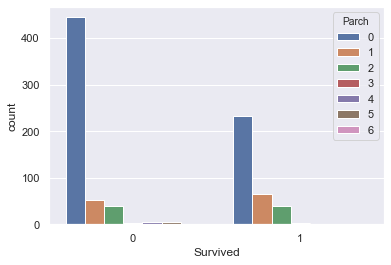

In [12]:
ax=sns.countplot(x="Survived",data=dataset,hue="Parch")#therefore survival chances also depend on parent child ratio

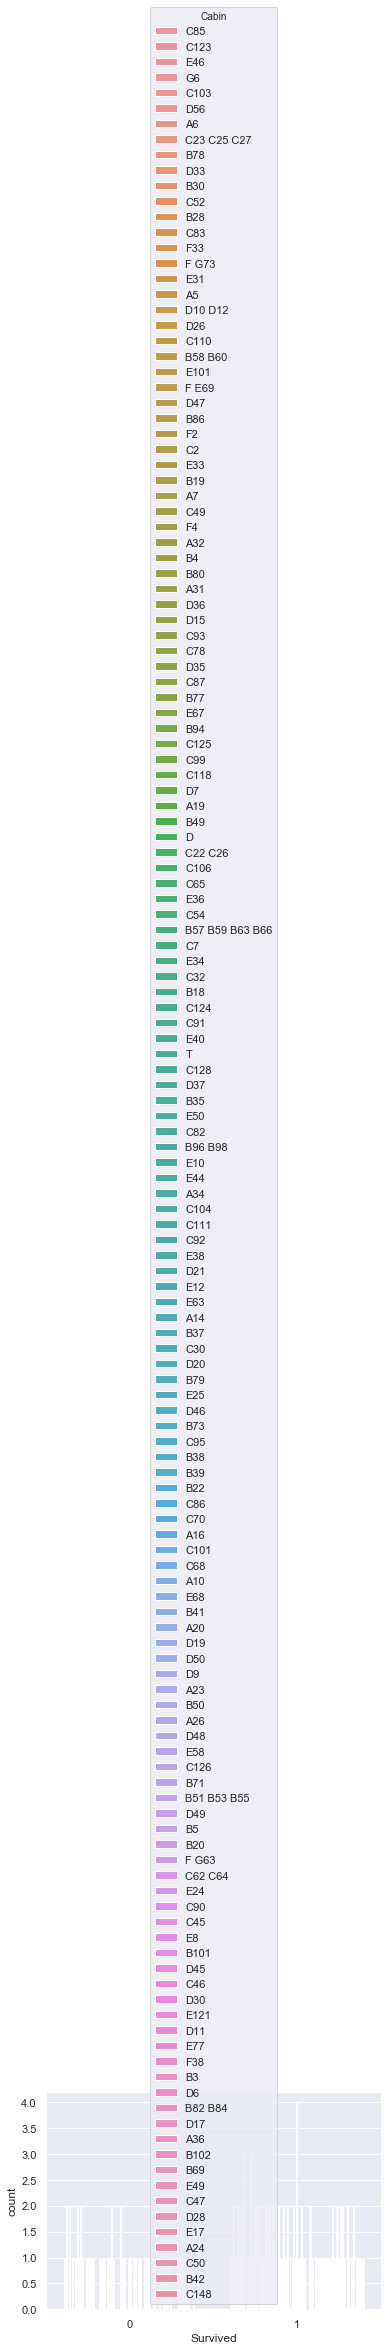

In [13]:
ax=sns.countplot(x="Survived",data=dataset,hue="Cabin")#therefore no relation between survival and cabin

In [14]:
#to remove or edit nan values from ages

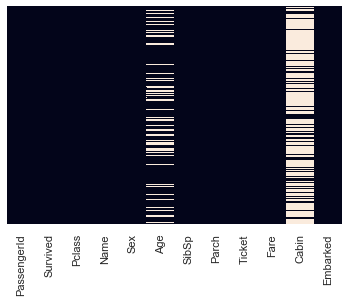

In [16]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [17]:
type (dataset)

pandas.core.frame.DataFrame

In [18]:
type(dataset.Age)

pandas.core.series.Series

In [19]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
d=dataset[["Age","Pclass"]]

In [21]:
d.head(2)

,Age,Pclass
0,22.0,3
1,38.0,1


In [22]:
pd.notna(dataset["Age"][1])

True

In [23]:
x,y,z=0,0,0
sum1,sum2,sum3=0,0,0
for i in d.index:
    if d["Pclass"][i]==1 and pd.notnull(d["Age"][i]):
        x+=1
        sum1=sum1+d["Age"][i]
    if d["Pclass"][i]==2 and pd.notnull(d["Age"][i]):
        y+=1
        sum2=sum2+d["Age"][i]
    if d["Pclass"][i]==3 and pd.notnull(d["Age"][i]):
        z+=1
        sum3=sum3+d["Age"][i]

In [24]:
x,y,z

(186, 173, 355)

In [25]:
sum1,sum2,sum3

(7111.42, 5168.83, 8924.92)

In [26]:
mean1=sum1/x
mean2=sum2/y
mean3=sum3/z

In [27]:
mean1,mean2,mean3

(38.233440860215055, 29.87763005780347, 25.14061971830986)

In [28]:
def fill(cols):
    age=cols[0]
    Pclass=cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            return mean1
        elif Pclass == 2:
            return mean2
        elif Pclass == 3:
            return mean3
    else:
        return age
    

In [29]:
dataset["Age"]=d.apply(fill,axis=1)

In [30]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

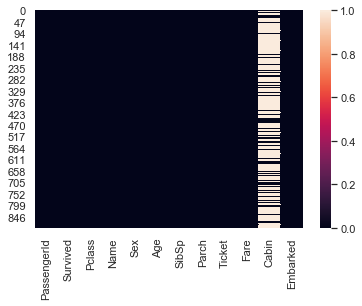

In [31]:
sns.heatmap(dataset.isnull())

In [32]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


In [33]:
sex=dataset["Sex"]
sex=pd.get_dummies(sex,drop_first=True)

In [34]:
pclass=dataset["Pclass"]
pclass=pd.get_dummies(pclass,drop_first=True)

In [35]:
sibsp = dataset['SibSp']
sibsp=pd.get_dummies(sibsp,drop_first=True)

In [36]:
parch = dataset['Parch']
parch = pd.get_dummies(parch, drop_first=True)

In [37]:
embarked = dataset['Embarked']
embarked = pd.get_dummies(embarked, drop_first=True)

In [38]:
age=dataset["Age"]

In [39]:
X=pd.concat([age,sex,parch,sibsp,embarked],axis=1)

In [40]:
X

,Age,male,1,2,3,4,5,6,1,2,3,4,5,8,Q,S
0,22.00000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,38.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,26.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,35.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,19.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,25.14062,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
889,26.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
y=dataset["Survived"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model=LogisticRegression()

In [46]:
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred=model.predict(X_test)

In [48]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
y=confusion_matrix(y_test,y_pred)

In [51]:
y

array([[134,  23],
       [ 32,  79]], dtype=int64)

In [52]:
134+23+32+79

268

In [53]:
134+79



213

In [54]:
213/268


0.7947761194029851

In [56]:
model.coef_

array([[-0.00351316, -2.38335328,  0.68249254, -0.00396843,  0.5329677 ,
        -0.94891823, -0.94904491, -0.50789469,  0.23377117, -0.13581767,
        -0.92090256, -0.5389299 , -0.75713682, -1.27967858, -0.81090479,
        -0.85147938]])